## 1. 기본 세팅

In [1]:
import pandas as pd
import numpy as np
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
## 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn     #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew      # for some statistics

In [4]:
## 데이터 불러오기
df = pd.DataFrame(pd.read_excel('C:/Users/USER/Desktop/공모전/공모전_data/최종_0932.xlsx'))

In [5]:
## 수질오염도가 null인 행 제거하기
df = df[~df['시군별_수질오염도'].isnull()]

In [6]:
## 분석에 사용할 컬럼만 따로 추출하기
df_num = df[['폭염일수_2020', '분뇨처리_총합', '분뇨처리_정화',
       '분뇨처리_퇴비', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '질병발생',
       '시도별_가축더위지수', '강수량_2020', '가축사육종사자수', '두수_한우', '두수_돼지', '두수_닭_오리',
       '두수_말', '두수_소계', '농가수_면적비', '가축분뇨발생량_합계_면적비', '읍면동_총거주자수_면적비', 
             '두수_소계_면적비', '시군별_수질오염도', '시군별_대기오염도', '시군별_토양오염도']]

## 2. 결측치 대체

* scikit-learn의 IterativeImpute 모델을 활용하여 결측치 대체

In [7]:
## 결측치 채우기
df_num_col = df_num.columns.tolist()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
df_num = pd.DataFrame(imputer.fit_transform(df_num))

df_num.columns = df_num_col

# 결측치 남았는지 확인하기
print(df_num.isnull().sum())

폭염일수_2020         0
분뇨처리_총합           0
분뇨처리_정화           0
분뇨처리_퇴비           0
읍면동_면적            0
하수처리시설_개수         0
분뇨처리업장_개수         0
읍면동_총거주자수         0
질병발생              0
시도별_가축더위지수        0
강수량_2020          0
가축사육종사자수          0
두수_한우             0
두수_돼지             0
두수_닭_오리           0
두수_말              0
두수_소계             0
농가수_면적비           0
가축분뇨발생량_합계_면적비    0
읍면동_총거주자수_면적비     0
두수_소계_면적비         0
시군별_수질오염도         0
시군별_대기오염도         0
시군별_토양오염도         0
dtype: int64


## 3. 정규화 및 표준화

### 3.1 로그변환
* 모든 컬럼에 대해 log1p 변환 적용

In [8]:
## 모든 컬럼에 대해 로그변환(log1p변환) 적용하기
for i in range(len(df_num.columns)):                        
    df_num.iloc[:, i] = df_num.iloc[:, i].apply(lambda x: np.log1p(x))

### 3.2 표준화
* 모든 컬럼에 대해 Min-Max Scaling 적용

In [9]:
## Min-Max Scaling 적용하기
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_num1 = pd.DataFrame(min_max.fit_transform(df_num))

col = df_num.columns.tolist()
df_num1.columns = col 
df_num1

,폭염일수_2020,분뇨처리_총합,분뇨처리_정화,분뇨처리_퇴비,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,시도별_가축더위지수,...,두수_닭_오리,두수_말,두수_소계,농가수_면적비,가축분뇨발생량_합계_면적비,읍면동_총거주자수_면적비,두수_소계_면적비,시군별_수질오염도,시군별_대기오염도,시군별_토양오염도
0,0.728771,0.737984,0.647682,0.661564,0.872753,0.520730,0.000000,0.574057,0.000000,0.553841,...,0.752848,0.431014,0.760597,0.131393,0.058740,0.007185,0.008613,0.359676,0.276697,0.324743
1,0.633985,0.588126,0.187151,0.601291,0.785744,0.657088,0.000000,0.029032,0.349167,0.553841,...,0.752311,0.262862,0.755681,0.099066,0.026158,0.000759,0.012525,0.248509,0.183465,0.296539
2,0.000000,0.338109,0.000000,0.349110,0.539888,0.000000,0.000000,0.373377,0.000000,0.553841,...,0.592929,0.000000,0.598695,0.348482,0.010967,0.020313,0.003603,0.306296,0.439234,0.314542
3,0.609679,0.635692,0.000000,0.655580,0.898198,0.721535,0.000000,0.255513,0.000000,0.553841,...,0.581247,0.357158,0.617700,0.104492,0.021746,0.001263,0.000756,0.395699,0.152576,0.667128
4,0.584771,0.664783,0.000000,0.675247,0.830317,0.891384,0.000000,0.085363,0.174583,0.553841,...,0.689287,0.000000,0.695314,0.102057,0.039584,0.000732,0.003757,0.600574,0.489524,0.465239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.629683,0.725026,0.000000,0.730627,0.690786,0.260365,0.000000,0.544272,0.174583,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.136015,0.017632,0.000000,0.393337,0.614731,0.389849
201,0.642950,0.594801,0.000000,0.611318,0.471848,0.164272,0.000000,0.584550,0.451292,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.142153,0.066493,0.000000,0.376250,0.838097,0.389849
202,0.634120,0.818061,0.000000,0.809987,0.569920,0.164272,0.333333,0.550560,0.405370,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.558176,0.034662,0.000000,0.462495,0.883024,0.389849
203,0.817493,0.715520,0.000000,0.717806,0.550432,0.381428,0.000000,0.632597,0.000000,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.260989,0.052851,0.000000,0.532119,0.951825,0.389849


## 4. 파생변수 생성

* 시군별 토양, 대기, 수질오염도 수치를 모두 합한 'sum' 컬럼 생성

In [10]:
## 토양, 대기, 수질오염도 수치를 합한 컬럼 생성하기
df_num1['sum'] = df_num1['시군별_토양오염도'] + df_num1['시군별_대기오염도'] + df_num1['시군별_수질오염도'] 
df_num1

,폭염일수_2020,분뇨처리_총합,분뇨처리_정화,분뇨처리_퇴비,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,시도별_가축더위지수,...,두수_말,두수_소계,농가수_면적비,가축분뇨발생량_합계_면적비,읍면동_총거주자수_면적비,두수_소계_면적비,시군별_수질오염도,시군별_대기오염도,시군별_토양오염도,sum
0,0.728771,0.737984,0.647682,0.661564,0.872753,0.520730,0.000000,0.574057,0.000000,0.553841,...,0.431014,0.760597,0.131393,0.058740,0.007185,0.008613,0.359676,0.276697,0.324743,0.961116
1,0.633985,0.588126,0.187151,0.601291,0.785744,0.657088,0.000000,0.029032,0.349167,0.553841,...,0.262862,0.755681,0.099066,0.026158,0.000759,0.012525,0.248509,0.183465,0.296539,0.728513
2,0.000000,0.338109,0.000000,0.349110,0.539888,0.000000,0.000000,0.373377,0.000000,0.553841,...,0.000000,0.598695,0.348482,0.010967,0.020313,0.003603,0.306296,0.439234,0.314542,1.060072
3,0.609679,0.635692,0.000000,0.655580,0.898198,0.721535,0.000000,0.255513,0.000000,0.553841,...,0.357158,0.617700,0.104492,0.021746,0.001263,0.000756,0.395699,0.152576,0.667128,1.215403
4,0.584771,0.664783,0.000000,0.675247,0.830317,0.891384,0.000000,0.085363,0.174583,0.553841,...,0.000000,0.695314,0.102057,0.039584,0.000732,0.003757,0.600574,0.489524,0.465239,1.555337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.629683,0.725026,0.000000,0.730627,0.690786,0.260365,0.000000,0.544272,0.174583,0.323955,...,0.000000,0.000000,0.000000,0.136015,0.017632,0.000000,0.393337,0.614731,0.389849,1.397917
201,0.642950,0.594801,0.000000,0.611318,0.471848,0.164272,0.000000,0.584550,0.451292,0.323955,...,0.000000,0.000000,0.000000,0.142153,0.066493,0.000000,0.376250,0.838097,0.389849,1.604196
202,0.634120,0.818061,0.000000,0.809987,0.569920,0.164272,0.333333,0.550560,0.405370,0.323955,...,0.000000,0.000000,0.000000,0.558176,0.034662,0.000000,0.462495,0.883024,0.389849,1.735367
203,0.817493,0.715520,0.000000,0.717806,0.550432,0.381428,0.000000,0.632597,0.000000,0.323955,...,0.000000,0.000000,0.000000,0.260989,0.052851,0.000000,0.532119,0.951825,0.389849,1.873792


In [11]:
## 종속변수로 사용할 컬럼만 따로 추출하기
df_종속 = df_num1[['시군별_대기오염도', '시군별_토양오염도', '시군별_수질오염도','sum']]
# 필요 없는 컬럼 제거하기
df_num1 = df_num1.drop(columns=['시군별_대기오염도', '시군별_토양오염도', '시군별_수질오염도', 'sum'])

## 5. 최적 회귀모형 선별

### 5.1 단계적 선택법(Stepwise selection)

In [12]:
## 단계적 선택법 알고리즘 구현하기
import statsmodels.api as sm
variables = df_num1.columns.tolist()        # 설명 변수 리스트
 
y = df_종속['sum']                          # 반응 변수
selected_variables = []                    # 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = []                           # 각 스텝별로 선택된 변수들
adjusted_r_squared = []                    # 각 스텝별 수정된 결정계수
steps = []                                 # 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)                            # 변수의 p-value
    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형 적합
    for col in remainder: 
        X = df_num[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter:                                      # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        # 선택된 변수들에 대해 어떤 변수를 제거할지 고름
        while len(selected_variables) > 0:
            selected_X = df_num[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:]   # 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove:                            # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_num[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

# 선택된 변수 출력하기
print(selected_variables)

['시도별_가축더위지수', '읍면동_총거주자수', '가축분뇨발생량_합계_면적비', '가축사육종사자수', '분뇨처리업장_개수', '분뇨처리_정화']


### 5.2 단계별 Adjust R-squared 값 분포

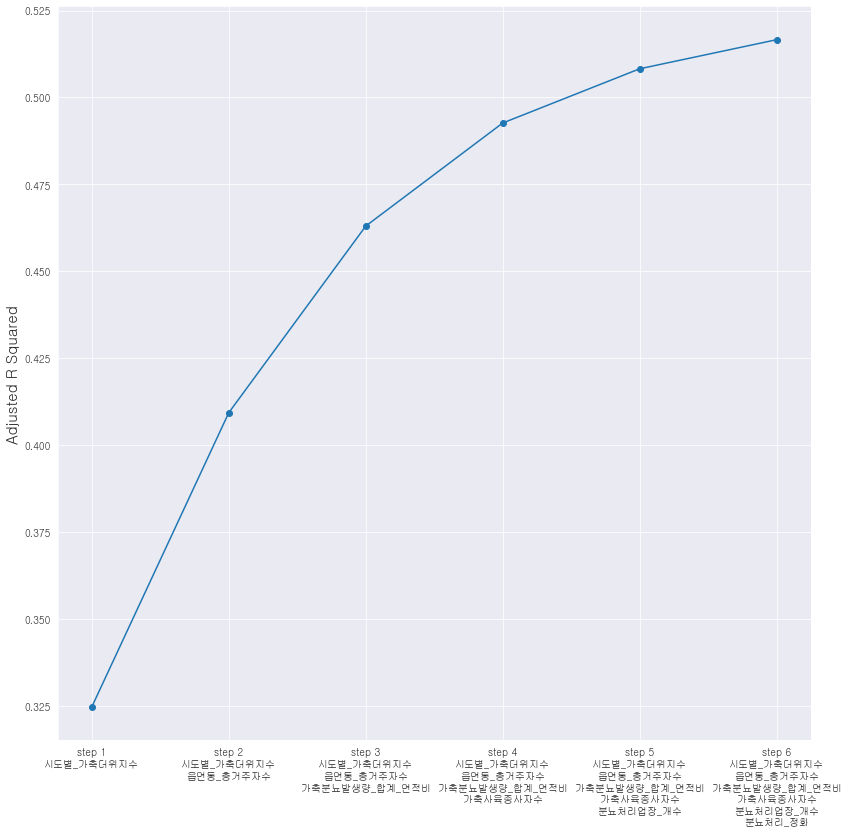

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13.5,13.5))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 6. 시군구별 환경오염지수 산출

### 6.1 다중회귀분석

In [14]:
# 다중회귀분석 수행
model = sm.OLS(y, sm.add_constant(pd.DataFrame(df_num[selected_variables]))).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     37.34
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           4.19e-30
Time:                        15:36:05   Log-Likelihood:                -35.278
No. Observations:                 205   AIC:                             84.56
Df Residuals:                     198   BIC:                             107.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.4427      5.003      6.285      0.000      21.577      41.308
시도별_가축더위지수        -7.4934      1.183     -6.335      0.000      -9.826      -5.161
읍면동_총거주자수          0.1415      0.025      5.570      0.000       0.091       0.192
가축분뇨발생량_합계_면적비  8.677e+04   2.09e+04      4.142      0.000    4.55e+04    1.28e+05
가축사육종사자수          -0.0854      0.019     -4.444      0.000      -0.123      -0.047
분뇨처리업장_개수          0.1114      0.041      2.705      0.007       0.030       0.193
분뇨처리_정화            0.0251      0.012      2.107      0.036       0.002       0.049
==============================================================================
Omnibus:                        2.450   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.900
Skew:                          -0.067   Prob(JB):                        0.387
Kurtosis:                       2.548   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.2 회귀계수를 가중치로 한 지수 생성

In [15]:
df_num2 = df_num1[['시도별_가축더위지수', '읍면동_총거주자수', '가축분뇨발생량_합계_면적비', 
               '가축사육종사자수', '분뇨처리업장_개수', '분뇨처리_정화']]

In [16]:
df_num2['환경오염지수'] = df_num2['시도별_가축더위지수'] * (-7.4934) + df_num2['읍면동_총거주자수'] * 0.1415 + df_num2['가축분뇨발생량_합계_면적비'] * 8.677e+04 + df_num2['가축사육종사자수'] * (-0.0854) + df_num2['분뇨처리업장_개수'] * 0.1114 + df_num2['분뇨처리_정화'] * 0.0251
df_num2.head(2)

,시도별_가축더위지수,읍면동_총거주자수,가축분뇨발생량_합계_면적비,가축사육종사자수,분뇨처리업장_개수,분뇨처리_정화,환경오염지수
0,0.553841,0.574057,0.058740,0.721357,0.0,0.647682,5092.776888
1,0.553841,0.029032,0.026158,0.636634,0.0,0.187151,2265.539534


In [20]:
## csv 파일로 내보내기
df_num2.to_csv('C:/Users/USER/Desktop/공모전/공모전_data/final_index.csv', encoding='utf-8-sig')